In [ ]:
!pip install fireducks

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 11.8 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Successfully uninstalled pyarrow-18.1.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 25.6.0 requires pyarrow<20.0.0a0,>=14.0.0; platform_machine == "x86_64", but you have pyarrow 21.0.0 which is incompatible.
pylibcudf-cu12 25.6.0 requires pyarrow<20.0.0a0,>=14.0.0; platform_machine == "x86_64", but you have pyarrow 21.0.0 which is incompatible.


# **Comparing Pandas vs FireDucks in terms of Speed**

In [50]:
data_path = '/content/sample_data/california_housing_train.csv'


import pandas as pd
import fireducks.pandas as fpd
import time

def measure_time(lib, file_path, runs=5):
    times = []
    for _ in range(runs):
        start = time.perf_counter()
        df = lib.read_csv(file_path)
        end = time.perf_counter()
        times.append(end - start)
    return sum(times) / len(times)



pandas_time = measure_time(pd, data_path)
fireducks_time = measure_time(fpd, data_path)

print(f"Pandas avg time: {pandas_time:.6f} seconds")
print(f"FireDucks avg time: {fireducks_time:.6f} seconds")

percent_faster = ((pandas_time - fireducks_time) / pandas_time) * 100
print(f"FireDucks is {percent_faster:.2f}% faster than Pandas")


Pandas avg time: 0.024797 seconds
FireDucks avg time: 0.010020 seconds
FireDucks is 59.59% faster than Pandas


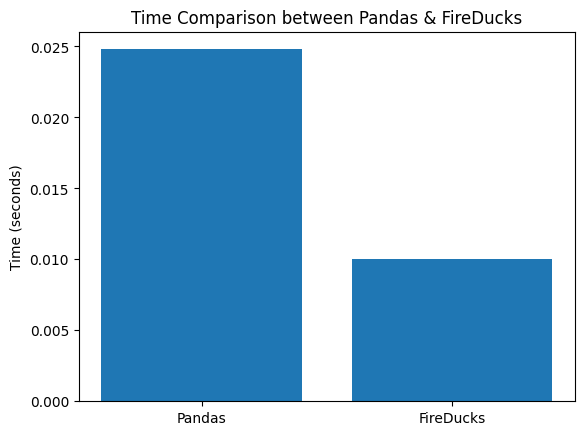

In [51]:
import matplotlib.pyplot as plt
plt.bar(['Pandas', 'FireDucks'], [pandas_time, fireducks_time])
plt.ylabel('Time (seconds)')
plt.title('Time Comparison between Pandas & FireDucks')
plt.show()